# Analyzing and Predicting Ridership Patterns Using Data Science on MTA Station Data
**By Daniel Friedman, Halle Ritter, Orlando Torres & Kailin Xie**
___

## Data Importing & Cleaning

### Import libraries for data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

### Set width of cells to 90%

In [4]:
# makes cell go 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Import our CSV using Pandas and make a dataframe

In [5]:
dframe141101 = pd.read_csv('turnstile_141101.txt')

In [6]:
dframe141101.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,00:00:00,REGULAR,4841726,1642694
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,04:00:00,REGULAR,4841761,1642697
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,08:00:00,REGULAR,4841779,1642714
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,12:00:00,REGULAR,4841925,1642826
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,16:00:00,REGULAR,4842220,1642910


### Remove extra whitespace around column names

In [7]:
dframe141101.columns = [column.strip() for column in dframe141101.columns]
dframe141101.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
dframe141101.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,00:00:00,REGULAR,4841726,1642694
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,04:00:00,REGULAR,4841761,1642697
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,08:00:00,REGULAR,4841779,1642714
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,12:00:00,REGULAR,4841925,1642826
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,16:00:00,REGULAR,4842220,1642910


### Drop column names we don't need
Drop 'C/A', 'UNIT', 'LINENAME', 'DIVISION', 'DESC', 'EXITS' off the first axis/row

In [9]:
dframe141101.drop(['C/A', 'UNIT', 'LINENAME', 'DIVISION', 'DESC', 'EXITS'], axis=1)

,SCP,STATION,DATE,TIME,ENTRIES
0,02-00-00,LEXINGTON AVE,10/25/2014,00:00:00,4841726
1,02-00-00,LEXINGTON AVE,10/25/2014,04:00:00,4841761
2,02-00-00,LEXINGTON AVE,10/25/2014,08:00:00,4841779
3,02-00-00,LEXINGTON AVE,10/25/2014,12:00:00,4841925
4,02-00-00,LEXINGTON AVE,10/25/2014,16:00:00,4842220
5,02-00-00,LEXINGTON AVE,10/25/2014,20:00:00,4842585
6,02-00-00,LEXINGTON AVE,10/26/2014,00:00:00,4842752
7,02-00-00,LEXINGTON AVE,10/26/2014,04:00:00,4842791
8,02-00-00,LEXINGTON AVE,10/26/2014,08:00:00,4842810
9,02-00-00,LEXINGTON AVE,10/26/2014,12:00:00,4842927


In [55]:
dframe141101.info()
# we can see there are no null values in this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193006 entries, 0 to 193005
Data columns (total 11 columns):
C/A         193006 non-null object
UNIT        193006 non-null object
SCP         193006 non-null object
STATION     193006 non-null object
LINENAME    193006 non-null object
DIVISION    193006 non-null object
DATE        193006 non-null object
TIME        193006 non-null object
DESC        193006 non-null object
ENTRIES     193006 non-null int64
EXITS       193006 non-null int64
dtypes: int64(2), object(9)
memory usage: 16.2+ MB


## Exploratory Data Analysis

### Let's find the unique values in the TIME column
There seem to be a large number of unique time values. We probably shouldn't group by time values in our analysis unless absolutely needed

In [10]:
# let's find the unique values for TIME
dframe141101.TIME.unique()

array(['00:00:00', '04:00:00', '08:00:00', ..., '07:17:08', '07:21:13',
       '07:06:49'], dtype=object)

## Data Analysis Deep Dive

### Find min and max ENTRIES per groupby of unique station and turnstile

In [11]:
# max entries per groupby of unique station and turnstile
day_max_values141101 = dframe141101.groupby(['STATION', 'SCP'])[['ENTRIES']].max()
day_max_values141101

ENTRIES
STATION         SCP               
1 AVE           00-00-00   8947481
                00-00-01   2839792
                00-03-00   1257715
                00-03-01   1058090
                00-03-02   4354905
                01-00-00    478574
                01-00-01   1578314
                01-00-02   6797858
                01-00-03  12964297
                01-00-04   2499090
103 ST          00-00-00  11048130
                00-00-01  10193742
                00-00-02  12971032
                00-00-03   6605401
                00-00-04   2266722
                00-00-05   6514986
                00-03-00   6208284
                00-03-01  10006744
                00-03-02   8236043
103 ST-CORONA   00-00-00  12828773
                00-00-01  11884883
                00-00-02   8270899
                00-00-03   9071421
                00-00-04   2748677
                00-05-00   7768805
                00-05-01   7533894
                00-06-00   2200737
                00-06-01   2452941
104 ST          00-00-00   4841141
                00-00-01   1636106
...                            ...
WOODHAVEN BLVD  00-00-02   3285536
                00-00-03   6083290
                00-03-00   1569567
                00-03-01  10479590
                00-03-02   9785440
                00-03-03    424776
                00-03-04   1188659
                01-05-00  33554475
                01-05-01         8
                01-06-00   9075208
                01-06-01   6142436
WOODLAWN ROAD   00-00-00   5216882
                00-00-01   6072985
                00-00-02   3018591
                00-00-03   4485448
                00-00-04   5342141
WORLD TRADE CTR 01-00-00   3217172
                01-00-01    288774
                01-00-02   4051954
                01-00-03   2625057
                01-05-00       569
                01-05-01         0
                01-06-00   7316770
                01-06-01   5646494
                01-06-02   2222633
                01-06-03   6596377
                01-06-04   1553026
YORK ST         00-00-00  10072210
                00-00-01  10180792
                00-00-02   7643865

[4038 rows x 1 columns]

In [12]:
# min entries per groupby of unique station and turnstile
day_min_values141101 = dframe141101.groupby(['STATION', 'SCP'])[['ENTRIES']].min()
day_min_values141101

ENTRIES
STATION         SCP               
1 AVE           00-00-00   8917883
                00-00-01   2801947
                00-03-00   1249811
                00-03-01   1051391
                00-03-02   4345110
                01-00-00    476506
                01-00-01   1572998
                01-00-02   6786485
                01-00-03  12943442
                01-00-04   2465968
103 ST          00-00-00   7118979
                00-00-01    331745
                00-00-02   3773774
                00-00-03   6584082
                00-00-04   2254613
                00-00-05   6503953
                00-03-00   6198281
                00-03-01   9994976
                00-03-02   8220915
103 ST-CORONA   00-00-00  12813779
                00-00-01  11872001
                00-00-02   8255865
                00-00-03   9057459
                00-00-04   2722597
                00-05-00   7757151
                00-05-01   7513296
                00-06-00   2193445
                00-06-01   2444089
104 ST          00-00-00   4834293
                00-00-01   1632907
...                            ...
WOODHAVEN BLVD  00-00-02   3281021
                00-00-03   6073690
                00-03-00   1550294
                00-03-01  10467116
                00-03-02   9773784
                00-03-03    417650
                00-03-04   1174769
                01-05-00       296
                01-05-01         0
                01-06-00    677735
                01-06-01    414225
WOODLAWN ROAD   00-00-00   5203616
                00-00-01   6063988
                00-00-02   3010919
                00-00-03   4474918
                00-00-04   5332627
WORLD TRADE CTR 01-00-00   3212756
                01-00-01    284596
                01-00-02   4046637
                01-00-03   2615534
                01-05-00       558
                01-05-01         0
                01-06-00   7304685
                01-06-01   5630739
                01-06-02   2213639
                01-06-03   6579553
                01-06-04   1549775
YORK ST         00-00-00  10053290
                00-00-01  10159434
                00-00-02   7625167

[4038 rows x 1 columns]

### Merge min and max entries for groupby of unique station and turnstile

In [13]:
max_min141101 = day_max_values141101.merge(day_min_values141101, left_index = True, right_index = True) #merged max
max_min141101.columns = ["MAX ENTRIES", "MIN ENTRIES"]
max_min141101

MAX ENTRIES  MIN ENTRIES
STATION         SCP                               
1 AVE           00-00-00      8947481      8917883
                00-00-01      2839792      2801947
                00-03-00      1257715      1249811
                00-03-01      1058090      1051391
                00-03-02      4354905      4345110
                01-00-00       478574       476506
                01-00-01      1578314      1572998
                01-00-02      6797858      6786485
                01-00-03     12964297     12943442
                01-00-04      2499090      2465968
103 ST          00-00-00     11048130      7118979
                00-00-01     10193742       331745
                00-00-02     12971032      3773774
                00-00-03      6605401      6584082
                00-00-04      2266722      2254613
                00-00-05      6514986      6503953
                00-03-00      6208284      6198281
                00-03-01     10006744      9994976
                00-03-02      8236043      8220915
103 ST-CORONA   00-00-00     12828773     12813779
                00-00-01     11884883     11872001
                00-00-02      8270899      8255865
                00-00-03      9071421      9057459
                00-00-04      2748677      2722597
                00-05-00      7768805      7757151
                00-05-01      7533894      7513296
                00-06-00      2200737      2193445
                00-06-01      2452941      2444089
104 ST          00-00-00      4841141      4834293
                00-00-01      1636106      1632907
...                               ...          ...
WOODHAVEN BLVD  00-00-02      3285536      3281021
                00-00-03      6083290      6073690
                00-03-00      1569567      1550294
                00-03-01     10479590     10467116
                00-03-02      9785440      9773784
                00-03-03       424776       417650
                00-03-04      1188659      1174769
                01-05-00     33554475          296
                01-05-01            8            0
                01-06-00      9075208       677735
                01-06-01      6142436       414225
WOODLAWN ROAD   00-00-00      5216882      5203616
                00-00-01      6072985      6063988
                00-00-02      3018591      3010919
                00-00-03      4485448      4474918
                00-00-04      5342141      5332627
WORLD TRADE CTR 01-00-00      3217172      3212756
                01-00-01       288774       284596
                01-00-02      4051954      4046637
                01-00-03      2625057      2615534
                01-05-00          569          558
                01-05-01            0            0
                01-06-00      7316770      7304685
                01-06-01      5646494      5630739
                01-06-02      2222633      2213639
                01-06-03      6596377      6579553
                01-06-04      1553026      1549775
YORK ST         00-00-00     10072210     10053290
                00-00-01     10180792     10159434
                00-00-02      7643865      7625167

[4038 rows x 2 columns]

### Find TOTAL ENTRIES per unique groupby of station and turnstile
The TOTAL ENTRIES is simply the difference of MAX ENTRIES - MIN ENTRIES

In [14]:
max_min141101["TOTAL ENTRIES"] = max_min141101["MAX ENTRIES"] - max_min141101["MIN ENTRIES"] #delta entries

In [15]:
max_min141101

MAX ENTRIES  MIN ENTRIES  TOTAL ENTRIES
STATION         SCP                                              
1 AVE           00-00-00      8947481      8917883          29598
                00-00-01      2839792      2801947          37845
                00-03-00      1257715      1249811           7904
                00-03-01      1058090      1051391           6699
                00-03-02      4354905      4345110           9795
                01-00-00       478574       476506           2068
                01-00-01      1578314      1572998           5316
                01-00-02      6797858      6786485          11373
                01-00-03     12964297     12943442          20855
                01-00-04      2499090      2465968          33122
103 ST          00-00-00     11048130      7118979        3929151
                00-00-01     10193742       331745        9861997
                00-00-02     12971032      3773774        9197258
                00-00-03      6605401      6584082          21319
                00-00-04      2266722      2254613          12109
                00-00-05      6514986      6503953          11033
                00-03-00      6208284      6198281          10003
                00-03-01     10006744      9994976          11768
                00-03-02      8236043      8220915          15128
103 ST-CORONA   00-00-00     12828773     12813779          14994
                00-00-01     11884883     11872001          12882
                00-00-02      8270899      8255865          15034
                00-00-03      9071421      9057459          13962
                00-00-04      2748677      2722597          26080
                00-05-00      7768805      7757151          11654
                00-05-01      7533894      7513296          20598
                00-06-00      2200737      2193445           7292
                00-06-01      2452941      2444089           8852
104 ST          00-00-00      4841141      4834293           6848
                00-00-01      1636106      1632907           3199
...                               ...          ...            ...
WOODHAVEN BLVD  00-00-02      3285536      3281021           4515
                00-00-03      6083290      6073690           9600
                00-03-00      1569567      1550294          19273
                00-03-01     10479590     10467116          12474
                00-03-02      9785440      9773784          11656
                00-03-03       424776       417650           7126
                00-03-04      1188659      1174769          13890
                01-05-00     33554475          296       33554179
                01-05-01            8            0              8
                01-06-00      9075208       677735        8397473
                01-06-01      6142436       414225        5728211
WOODLAWN ROAD   00-00-00      5216882      5203616          13266
                00-00-01      6072985      6063988           8997
                00-00-02      3018591      3010919           7672
                00-00-03      4485448      4474918          10530
                00-00-04      5342141      5332627           9514
WORLD TRADE CTR 01-00-00      3217172      3212756           4416
                01-00-01       288774       284596           4178
                01-00-02      4051954      4046637           5317
                01-00-03      2625057      2615534           9523
                01-05-00          569          558             11
                01-05-01            0            0              0
                01-06-00      7316770      7304685          12085
                01-06-01      5646494      5630739          15755
                01-06-02      2222633      2213639           8994
                01-06-03      6596377      6579553          16824
                01-06-04      1553026      1549775           3251
YORK ST         00-00-00     10072210     10053290          18920


### Drop columns for MAX ENTRIES and MIN ENTRIES

In [16]:
station_total141101 = max_min141101.drop(["MAX ENTRIES", "MIN ENTRIES"], axis = 1)

In [17]:
station_total141101

TOTAL ENTRIES
STATION         SCP                    
1 AVE           00-00-00          29598
                00-00-01          37845
                00-03-00           7904
                00-03-01           6699
                00-03-02           9795
                01-00-00           2068
                01-00-01           5316
                01-00-02          11373
                01-00-03          20855
                01-00-04          33122
103 ST          00-00-00        3929151
                00-00-01        9861997
                00-00-02        9197258
                00-00-03          21319
                00-00-04          12109
                00-00-05          11033
                00-03-00          10003
                00-03-01          11768
                00-03-02          15128
103 ST-CORONA   00-00-00          14994
                00-00-01          12882
                00-00-02          15034
                00-00-03          13962
                00-00-04          26080
                00-05-00          11654
                00-05-01          20598
                00-06-00           7292
                00-06-01           8852
104 ST          00-00-00           6848
                00-00-01           3199
...                                 ...
WOODHAVEN BLVD  00-00-02           4515
                00-00-03           9600
                00-03-00          19273
                00-03-01          12474
                00-03-02          11656
                00-03-03           7126
                00-03-04          13890
                01-05-00       33554179
                01-05-01              8
                01-06-00        8397473
                01-06-01        5728211
WOODLAWN ROAD   00-00-00          13266
                00-00-01           8997
                00-00-02           7672
                00-00-03          10530
                00-00-04           9514
WORLD TRADE CTR 01-00-00           4416
                01-00-01           4178
                01-00-02           5317
                01-00-03           9523
                01-05-00             11
                01-05-01              0
                01-06-00          12085
                01-06-01          15755
                01-06-02           8994
                01-06-03          16824
                01-06-04           3251
YORK ST         00-00-00          18920
                00-00-01          21358
                00-00-02          18698

[4038 rows x 1 columns]

### Sum TOTAL ENTRIES of all turnstiles per station

In [18]:
station_sum141101 = station_total141101.sum(level = "STATION")

In [19]:
station_sum141101

,TOTAL ENTRIES
STATION,
1 AVE,164575
103 ST,23069766
103 ST-CORONA,131348
104 ST,17637
110 ST,81741
110 ST-CATHEDRL,93857
110 ST-CPN,67004
111 ST,31080538
116 ST,30313147


### Perform all analysis on MTA turnstile data for April 25, 2015

In [20]:
# make a function for all the analysis below
# make a list of the numbers for the txt files
# make one argument to the function: csv_numbers
# pass that argument within the body of the function to be used (even in dataframe name)
# return a list of station_sum{csv_name} values
# call the function and assign variables to the proper names of station_sum{csv_name} used below

In [21]:
mta_csv_numbers = ['150425', '151031', '160430', '161029']
def generate_mta_analysis(list_of_csv_numbers):
    dataframe_results = []
    for csv_number in list_of_csv_numbers:
        dframe = pd.read_csv('turnstile_' + csv_number + '.txt')
        dframe.columns = [column.strip() for column in dframe.columns]
        dframe.drop(['C/A', 'UNIT', 'LINENAME', 'DIVISION', 'DESC', 'EXITS'], axis=1)
        day_max_values = dframe.groupby(['STATION', 'SCP'])[['ENTRIES']].max()
        day_min_values = dframe.groupby(['STATION', 'SCP'])[['ENTRIES']].min()
        max_min = day_max_values.merge(day_min_values, left_index = True, right_index = True)
        max_min.columns = ["MAX ENTRIES", "MIN ENTRIES"]
        max_min["TOTAL ENTRIES"] = max_min["MAX ENTRIES"] - max_min["MIN ENTRIES"]
        station_total = max_min.drop(["MAX ENTRIES", "MIN ENTRIES"], axis = 1)
        station_sum = station_total.sum(level = 'STATION')
        dataframe_results.append([csv_number, station_sum])
    return dataframe_results

In [22]:
function_returned_values = generate_mta_analysis(mta_csv_numbers)
station_sum150425 = function_returned_values[0][1]
station_sum151031 = function_returned_values[1][1]
station_sum160430 = function_returned_values[2][1]
station_sum161029 = function_returned_values[3][1]

### Let's merge all our results into one dataframe

In [23]:
merge1 = pd.merge(station_sum141101, station_sum150425, left_index = True, right_index = True) #merging dates
merge1

,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,
1 AVE,164575,115895
103 ST,23069766,23138684
103 ST-CORONA,131348,128830
104 ST,17637,17011
110 ST,81741,71353
110 ST-CATHEDRL,93857,70425
110 ST-CPN,67004,64424
111 ST,31080538,31750829
116 ST,30313147,30707967


### Merge TOTAL ENTRIES data for these 5 weeks represented by the 5 different CSV analyses

In [24]:
merge2 = pd.merge(merge1, station_sum151031, left_index = True, right_index = True)
merge2

,TOTAL ENTRIES_x,TOTAL ENTRIES_y,TOTAL ENTRIES
STATION,,,
1 AVE,164575,115895,162726
103 ST,23069766,23138684,23783513
103 ST-CORONA,131348,128830,127354
104 ST,17637,17011,17623
110 ST,81741,71353,83372
110 ST-CATHEDRL,93857,70425,87056
110 ST-CPN,67004,64424,66331
111 ST,31080538,31750829,32491531
116 ST,30313147,30707967,1638311143


In [25]:
merge3 = pd.merge(merge2, station_sum160430, left_index = True, right_index = True)
merge3

,TOTAL ENTRIES_x,TOTAL ENTRIES_y,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,,,
103 ST,23069766,23138684,23783513,54947559
103 ST-CORONA,131348,128830,127354,121400
104 ST,17637,17011,17623,2027650771
110 ST,81741,71353,83372,80391
111 ST,31080538,31750829,32491531,40413224
116 ST,30313147,30707967,1638311143,1635175315
116 ST-COLUMBIA,117874,90688,109776,98407
121 ST,17064,15669,17946,14360
125 ST,2427480208,5455514772,3800977514,5736197298


In [26]:
merge4 = pd.merge(merge3, station_sum161029, left_index = True, right_index = True)
merge4

,TOTAL ENTRIES_x,TOTAL ENTRIES_y,TOTAL ENTRIES_x,TOTAL ENTRIES_y,TOTAL ENTRIES
STATION,,,,,
103 ST,23069766,23138684,23783513,54947559,55519737
103 ST-CORONA,131348,128830,127354,121400,130160
104 ST,17637,17011,17623,2027650771,3146681459
110 ST,81741,71353,83372,80391,82282
111 ST,31080538,31750829,32491531,40413224,41158409
116 ST,30313147,30707967,1638311143,1635175315,1625800221
116 ST-COLUMBIA,117874,90688,109776,98407,109988
121 ST,17064,15669,17946,14360,16774
125 ST,2427480208,5455514772,3800977514,5736197298,5669699429


### Names columns in dataframe with their respective end weeks that corresponds to ENTRIES that previous week

In [27]:
merge4.columns = ["2014/11/01", "2015/04/25", "2015/10/31", "2016/04/30", "2016/10/29"]
merge4

,2014/11/01,2015/04/25,2015/10/31,2016/04/30,2016/10/29
STATION,,,,,
103 ST,23069766,23138684,23783513,54947559,55519737
103 ST-CORONA,131348,128830,127354,121400,130160
104 ST,17637,17011,17623,2027650771,3146681459
110 ST,81741,71353,83372,80391,82282
111 ST,31080538,31750829,32491531,40413224,41158409
116 ST,30313147,30707967,1638311143,1635175315,1625800221
116 ST-COLUMBIA,117874,90688,109776,98407,109988
121 ST,17064,15669,17946,14360,16774
125 ST,2427480208,5455514772,3800977514,5736197298,5669699429


### Create TOTAL CHANGE column as proportion change from Nov. 1, 2014 to Oct. 29, 2016

In [28]:
merge4["TOTAL CHANGE"] = ((merge4["2016/10/29"] - merge4["2014/11/01"]) / merge4["2014/11/01"])
merge4 #calculated change from first to last (as fraction)

,2014/11/01,2015/04/25,2015/10/31,2016/04/30,2016/10/29,TOTAL CHANGE
STATION,,,,,,
103 ST,23069766,23138684,23783513,54947559,55519737,1.406602
103 ST-CORONA,131348,128830,127354,121400,130160,-0.009045
104 ST,17637,17011,17623,2027650771,3146681459,178412.645121
110 ST,81741,71353,83372,80391,82282,0.006618
111 ST,31080538,31750829,32491531,40413224,41158409,0.324250
116 ST,30313147,30707967,1638311143,1635175315,1625800221,52.633502
116 ST-COLUMBIA,117874,90688,109776,98407,109988,-0.066902
121 ST,17064,15669,17946,14360,16774,-0.016995
125 ST,2427480208,5455514772,3800977514,5736197298,5669699429,1.335632


### Sort TOTAL CHANGE column from smallest to largest

In [29]:
sorted_merged = merge4.sort_values(by = "TOTAL CHANGE")
sorted_merged #sorted by change from first to last

,2014/11/01,2015/04/25,2015/10/31,2016/04/30,2016/10/29,TOTAL CHANGE
STATION,,,,,,
231 ST,100721269,48303,51506,55064,63326,-0.999371
SUTPHIN BLVD,26630882,27906484,29413960,26961,27728,-0.998959
VAN SICLEN AVE,8117592,8215119,4775995,18403,21153,-0.997394
STEINWAY ST,3220410,93977,94266,90323,91459,-0.971600
NEWARK HM HE,3466,13060,2108,16315,266,-0.923254
77 ST,1297646202,1299156037,152547057,153702649,154874884,-0.880649
21 ST,53947,60339,62397,11570,12932,-0.760283
CITY / BUS,326938,94900,293281,100889,91947,-0.718763
14TH STREET,92332,56379,59706,57253,45017,-0.512444


### Show column for SCP that is unique turnstiles per station

In [30]:
scp_count = pd.DataFrame(dframe141101.groupby(['STATION'])['SCP'].nunique())
scp_merge = pd.merge(scp_count, merge4, left_index = True, right_index = True)
scp_merge

,SCP,2014/11/01,2015/04/25,2015/10/31,2016/04/30,2016/10/29,TOTAL CHANGE
STATION,,,,,,,
103 ST,9,23069766,23138684,23783513,54947559,55519737,1.406602
103 ST-CORONA,9,131348,128830,127354,121400,130160,-0.009045
104 ST,4,17637,17011,17623,2027650771,3146681459,178412.645121
110 ST,6,81741,71353,83372,80391,82282,0.006618
111 ST,5,31080538,31750829,32491531,40413224,41158409,0.324250
116 ST,11,30313147,30707967,1638311143,1635175315,1625800221,52.633502
116 ST-COLUMBIA,6,117874,90688,109776,98407,109988,-0.066902
121 ST,5,17064,15669,17946,14360,16774,-0.016995
125 ST,23,2427480208,5455514772,3800977514,5736197298,5669699429,1.335632


In [31]:
# 2174 unique turnstiles over all our stations analyzed
scp_merge['SCP'].sum()

2174

## Make plots of downtrending and uptrending stations

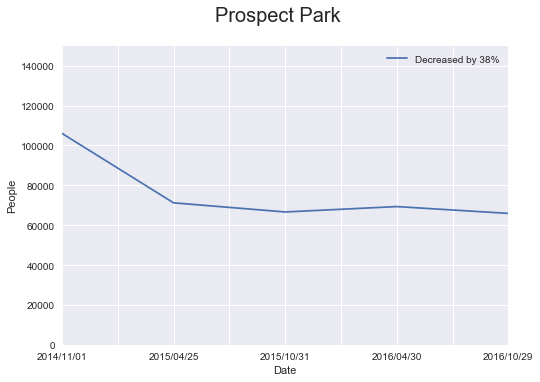

In [32]:
prospect_park = sorted_merged.loc['PROSPECT PARK',"2014/11/01":"2016/10/29"].plot( ylim = [0, 150000])
plt.pyplot.suptitle('Prospect Park', fontsize=20)
prospect_park.set(ylabel = "People")
prospect_park.set(xlabel = "Date")
prospect_park.legend(["Decreased by 38%"])
prospect_park

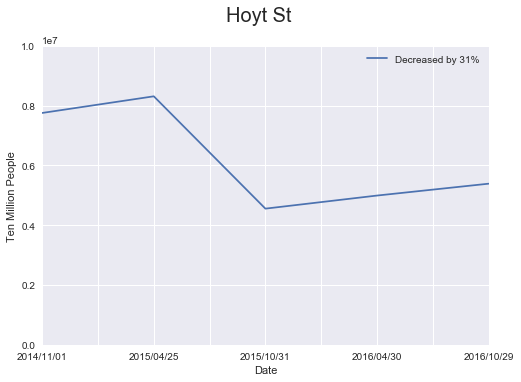

In [33]:
hoyt_st = sorted_merged.loc['HOYT ST',"2014/11/01":"2016/10/29"].plot(ylim = [0, 10000000])
plt.pyplot.suptitle('Hoyt St', fontsize=20)
hoyt_st.set(ylabel = "Ten Million People")
hoyt_st.set(xlabel = "Date")
hoyt_st.legend(["Decreased by 31%"])
hoyt_st

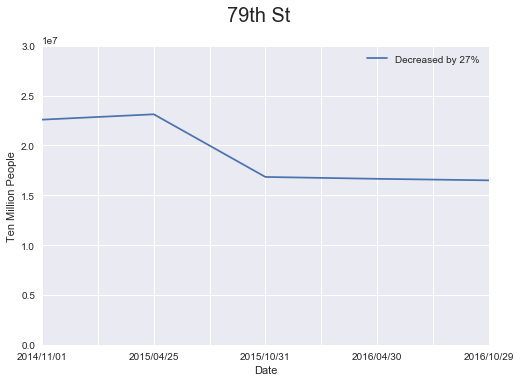

In [56]:
st_79 = sorted_merged.loc['79 ST',"2014/11/01":"2016/10/29"].plot(ylim = [0, 30000000])
plt.pyplot.suptitle('79th St', fontsize=20)
st_79.set(ylabel = "Ten Million People")
st_79.set(xlabel = "Date")
st_79.legend(["Decreased by 27%"])
st_79

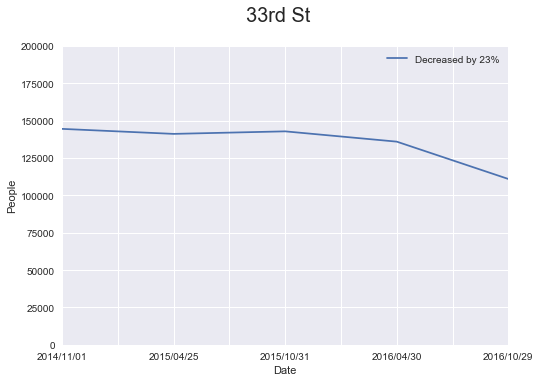

In [35]:
thirty_third_st = sorted_merged.loc['THIRTY THIRD ST',"2014/11/01":"2016/10/29"].plot(ylim = [0, 200000])
plt.pyplot.suptitle('33rd St', fontsize=20)
thirty_third_st.set(ylabel = "People")
thirty_third_st.set(xlabel = "Date")
thirty_third_st.legend(["Decreased by 23%"])
thirty_third_st

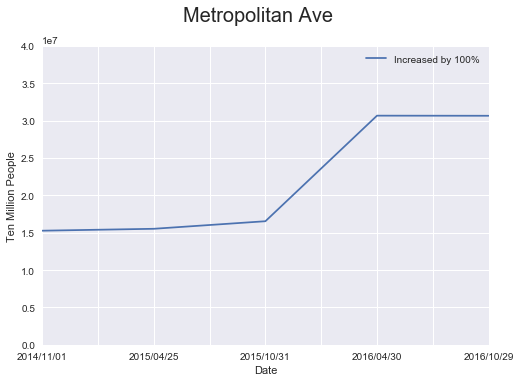

In [36]:
metropolitan_av = sorted_merged.loc['METROPOLITAN AV',"2014/11/01":"2016/10/29"].plot(ylim = [0, 40000000])
plt.pyplot.suptitle('Metropolitan Ave', fontsize=20)
metropolitan_av.set(ylabel = "Ten Million People")
metropolitan_av.set(xlabel = "Date")
metropolitan_av.legend(["Increased by 100%"])
metropolitan_av

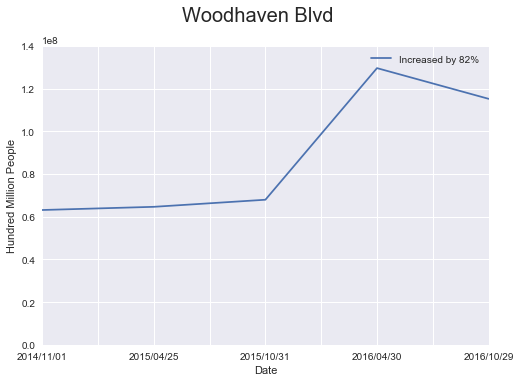

In [37]:
woodhaven_blvd = sorted_merged.loc['WOODHAVEN BLVD',"2014/11/01":"2016/10/29"].plot(ylim = [0, 140000000])
plt.pyplot.suptitle('Woodhaven Blvd', fontsize=20)
woodhaven_blvd.set(ylabel = "Hundred Million People")
woodhaven_blvd.set(xlabel = "Date")
woodhaven_blvd.legend(["Increased by 82%"])
woodhaven_blvd

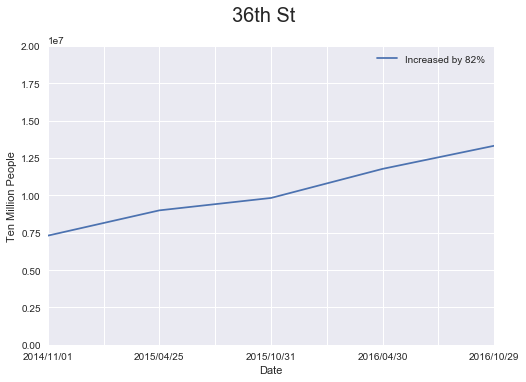

In [38]:
st_36 = sorted_merged.loc['36 ST',"2014/11/01":"2016/10/29"].plot(ylim = [0, 20000000])
plt.pyplot.suptitle('36th St', fontsize=20)
st_36.set(ylabel = "Ten Million People")
st_36.set(xlabel = "Date")
st_36.legend(["Increased by 82%"])
st_36

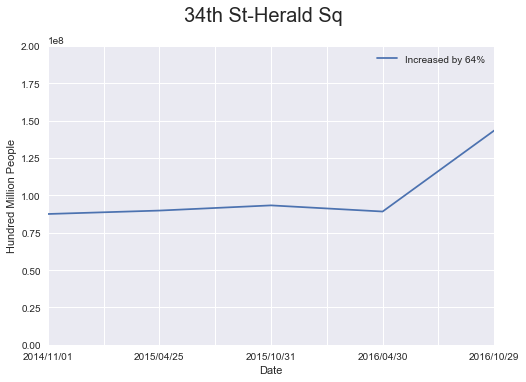

In [39]:
st_34_herald_sq = sorted_merged.loc['34 ST-HERALD SQ',"2014/11/01":"2016/10/29"].plot(ylim = [0, 200000000])
plt.pyplot.suptitle('34th St-Herald Sq', fontsize=20)
st_34_herald_sq.set(ylabel = "Hundred Million People")
st_34_herald_sq.set(xlabel = "Date")
st_34_herald_sq.legend(["Increased by 64%"])
st_34_herald_sq

## Appendix Insights

In [40]:
dframe141101.ENTRIES.count()

193006

In [42]:
frequency_value_entries = dframe141101.ENTRIES.value_counts(sort=True, ascending=False)
frequency_value_entries

# this shows entries, frequencies for eadch 4-hour row in our dataframe
# we seem to have 169 instances (in a 4-hour timeframe) in which 100,663,296 people passed through. It's cumulative so it's possible we hit that value...and then it broke for a few hours
# is the fact that this value is so high could lead to a confounding variable in our analysis

0            3684
1            1310
2             592
3             560
5             235
10            208
14            202
4             187
100663296     169
17            169
7             166
15            159
12            150
50331648      134
8             131
45            106
13             94
2738           94
117440512      91
20             89
16             85
175            84
6              84
39             74
89             74
505            67
29             67
43             65
44             62
359            58
             ... 
9104265         1
3072904         1
7248775         1
1987753         1
10140547        1
1672585         1
961409          1
435072          1
106904          1
6898556         1
400279          1
5927834         1
3458940         1
3298206         1
604215          1
3095475         1
6235056         1
4447151         1
1837822         1
246700          1
4252283         1
236455          1
347587          1
7570340         1
3027046   

In [43]:
# we want to see if there's a cumulative entries value (per 4 hour timeframe value) that's stuck at over 10000 people entries. We randomly chose 10,000 because this likely means the turnstile has some significance 
# as it's been used a lot the past. However, we want to see if that unique value for cumulative entries is seen in over 50 rows. If we consistently see that cumulative entries value, that likely means
# the turnstile or counter is broken. This technical issue could be a confounding value in regards to our insights.

for index, value in frequency_value_entries.iteritems():
    if index > 10000 and value > 50:
        print(index, value)

100663296 169
50331648 134
117440512 91


In [45]:
# sort by highest counts for entries in our dataframe (but this is grouped by hour timeframes)
dframe141101.sort_values(['ENTRIES'], ascending=False).head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
122438,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,20:00:00,REGULAR,2114034950,1711339356
122437,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,16:00:00,REGULAR,2114034353,1711339137
122436,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,12:00:00,REGULAR,2114033974,1711338929
122435,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,08:00:00,REGULAR,2114033754,1711338507
122434,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,04:00:00,REGULAR,2114033701,1711338305
122433,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/31/2014,00:00:00,REGULAR,2114033676,1711338296
122432,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/30/2014,20:00:00,REGULAR,2114033456,1711338230
122431,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/30/2014,16:00:00,REGULAR,2114032689,1711338017
122430,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/30/2014,12:00:00,REGULAR,2114032272,1711337783
122429,R116,R030,00-00-02,CHAMBERS ST,123,IRT,10/30/2014,08:00:00,REGULAR,2114032006,1711337249


In [47]:
# here we're only viewing our dataframe in which row ENTRIES value is 100663296
high_common_entry_rows = dframe141101[dframe141101['ENTRIES'] == 100663296]
high_common_entry_rows
# it seems a lot of rows span 4 hours just as they should

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
16493,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,00:00:00,REGULAR,100663296,53
16494,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,04:00:00,REGULAR,100663296,53
16495,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,08:00:00,REGULAR,100663296,53
16496,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,12:00:00,REGULAR,100663296,53
16497,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,16:00:00,REGULAR,100663296,53
16498,B022,R229,00-03-01,AVE M,BQ,BMT,10/25/2014,20:00:00,REGULAR,100663296,53
16499,B022,R229,00-03-01,AVE M,BQ,BMT,10/26/2014,00:00:00,REGULAR,100663296,53
16500,B022,R229,00-03-01,AVE M,BQ,BMT,10/26/2014,04:00:00,REGULAR,100663296,53
16501,B022,R229,00-03-01,AVE M,BQ,BMT,10/26/2014,08:00:00,REGULAR,100663296,53
16502,B022,R229,00-03-01,AVE M,BQ,BMT,10/26/2014,12:00:00,REGULAR,100663296,53


In [48]:
high_common_entry_rows.groupby(['STATION', 'C/A', 'UNIT', 'SCP']).ENTRIES.count().reset_index()
# we have 42 rows in which the station 66 ST-LINCOLN has entries of 100663296 entries 
# ... and so forth with the 3 other stations

# WE'RE OK. It's likely a technical issue in the system in which these turnstiles got stuck at this exact max value. This may skew some of our data...

,STATION,C/A,UNIT,SCP,ENTRIES
0,66 ST-LINCOLN,R159,R164,01-05-01,42
1,AVE M,B022,R229,00-03-01,43
2,FORDHAM ROAD,R289,R119,00-05-01,42
3,NECK ROAD,B026,R230,00-05-01,42


In [49]:
second_highest_common_entry_rows = dframe141101[dframe141101['ENTRIES'] == 50331648]
second_highest_common_entry_rows
# it seems some of the time gaps between rows are smaller than usual (sometimes even an hour), so it seems less likely that the same cumulative value is an issue

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
47257,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,00:00:00,REGULAR,50331648,16777216
47258,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,04:00:00,REGULAR,50331648,16777216
47259,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,08:00:00,REGULAR,50331648,16777216
47260,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,12:00:00,REGULAR,50331648,16777216
47261,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,16:00:00,REGULAR,50331648,16777216
47262,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/25/2014,20:00:00,REGULAR,50331648,16777216
47263,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/26/2014,00:00:00,REGULAR,50331648,16777216
47264,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/26/2014,04:00:00,REGULAR,50331648,16777216
47265,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/26/2014,08:00:00,REGULAR,50331648,16777216
47266,N049,R084,01-05-01,59 ST-COLUMBUS,ABCD1,IND,10/26/2014,12:00:00,REGULAR,50331648,16777220


In [50]:
second_highest_common_entry_rows.groupby(['STATION', 'C/A', 'UNIT', 'SCP']).ENTRIES.count().reset_index()
# we now have 3 stations that exhibited this same hold on a very large (and random) cumulative entries value

,STATION,C/A,UNIT,SCP,ENTRIES
0,59 ST-COLUMBUS,N049,R084,01-05-01,42
1,BROADWAY/LAFAY,N519A,R461,01-05-01,47
2,ROOSEVELT AVE,N324,R018,00-02-01,45


In [52]:
third_highest_common_entry_rows = dframe141101[dframe141101['ENTRIES'] == 117440512]
third_highest_common_entry_rows

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
23855,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,00:00:00,REGULAR,117440512,88
23856,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,04:00:00,REGULAR,117440512,88
23857,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,08:00:00,REGULAR,117440512,88
23858,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,12:00:00,REGULAR,117440512,88
23859,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,16:00:00,REGULAR,117440512,88
23860,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/25/2014,20:00:00,REGULAR,117440512,88
23861,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/26/2014,00:00:00,REGULAR,117440512,88
23862,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/26/2014,04:00:00,REGULAR,117440512,88
23863,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/26/2014,08:00:00,REGULAR,117440512,88
23864,C028,R216,01-05-01,BAY RIDGE-95 ST,R,BMT,10/26/2014,12:00:00,REGULAR,117440512,88


In [53]:
third_highest_common_entry_rows.groupby(['STATION', 'C/A', 'UNIT', 'SCP']).ENTRIES.count().reset_index()
# we have two stations that are somehow stuck at the same entry count...

,STATION,C/A,UNIT,SCP,ENTRIES
0,59 ST-COLUMBUS,N051,R084,02-05-01,49
1,BAY RIDGE-95 ST,C028,R216,01-05-01,42
